# **Data Preview**

In [21]:
from google.colab import files
uploaded = files.upload()

Saving Artificialintelligence.csv to Artificialintelligence.csv


In [49]:
!pip install --upgrade pandas


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 54.5 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


In [51]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
from pandas import read_csv, set_option
df = pd.read_csv("Artificialintelligence.csv", delimiter=";")
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 700)
print(df.head(10))

   ID Диалога  Шаг диалог                                              Текст                                           Контекст          Метка                                Функции                         Аннотации 
0        45.0         1.0  Здравствуйте, говорит личный помощник [Ваше Им...                            Стандартное приветствие     нейтрально                                      -                                  -
1        45.0         2.0  Это Райан из City Power, звоню по срочному воп...             Заявляет, что требуется срочная оплата  мошенничество              требование срочной оплаты                  угроза отключения
2        45.0         3.0  Я не знаю о каком-либо неоплаченном счете. Мож...                     Сомневается в законности счета  мошенничество                   запрос деталей счета            сомнение в легитимности
3        45.0         4.0  Сумма задолженности — 450 долларов за последни...                Указывает конкретную сумму и период  мош

In [25]:
df = pd.read_csv("Artificialintelligence.csv", delimiter=";")
print("Колонки в файле:", df.columns.tolist())

Колонки в файле: ['ID Диалога', 'Шаг диалог', 'Текст', 'Контекст', 'Метка', 'Функции', 'Аннотации ']


# **Data** **understanding**

In [40]:
print(df.isnull().sum())
#cколько пустых значений в столбцах

ID Диалога    0
Шаг диалог    0
Текст         0
Контекст      0
Метка         0
Функции       0
Аннотации     0
dtype: int64


In [42]:
print(df['Метка'].value_counts())
#категории встречающиеся чаще всего в столбце 'Метка'

Метка
мошенничество                                                                    40
мошеннический ответ                                                              15
нейтрально                                                                        6
законный                                                                          6
отклонение официальных протоколов"                                                1
уделяя особое внимание безопасности и соблюдению требований законодательства"     1
готов к дальнейшему взаимодействию"                                               1
Name: count, dtype: int64


In [57]:
print(df['Контекст'].value_counts())

Контекст
"Стандартный вводный обмен"                     5
Стандартное приветствие                         1
Заявляет, что требуется срочная оплата          1
Сомневается в законности счета                  1
Пытается проверить информацию самостоятельно    1
                                               ..
Притворяется службой поддержки                  1
Обещание денежных средств                       1
Запрос данных карты                             1
Обещание выигрыша                               1
Просьба о переводе                              1
Name: count, Length: 66, dtype: int64


## Data **Cleaning**

In [68]:
df = pd.read_csv('Artificialintelligence.csv',
                 sep=';',
                 encoding='utf-8-sig',
                 dtype={'ID Диалога': str, 'Шаг диалог': str},
                 on_bad_lines='warn')


In [69]:
df = df.dropna(how='all')
# Удаление пустых строк

In [70]:
text_cols = ['Текст', 'Контекст', 'Метка', 'Функции', 'Аннотации ']
df[text_cols] = df[text_cols].apply(lambda x: x.str.replace(r'[«»"”“]', '', regex=True))  # Удаление лишних кавычек
df[text_cols] = df[text_cols].apply(lambda x: x.str.strip())  # Удаление пробелов по краям

In [63]:
# Унификация меток
df['Метка'] = df['Метка'].replace({
    'мошеннический ответ': 'мошенничество',
    'реакция на мошенничество': 'мошенничество'
})

In [65]:
# Исправление числовых полей
df['ID Диалога'] = df['ID Диалога'].str.replace(r'\.0$', '', regex=True)
df['Шаг диалог'] = df['Шаг диалог'].str.replace(r'\.0$', '', regex=True)
# Замена пропущенных значений
df.fillna({'Функции': 'не указано', 'Аннотации': 'не указано'}, inplace=True)

# Удаление дубликатов
df = df.drop_duplicates(subset=['ID Диалога', 'Шаг диалог', 'Текст'], keep='first')

In [74]:
# Фильтрация некорректных строк
df = df[df['Текст'].str.len() > 5]  # Удаление слишком коротких текстов

# Восстановление порядка столбцов
columns_order = ['ID Диалога', 'Шаг диалог', 'Текст', 'Контекст', 'Метка', 'Функции', 'Аннотации ']
df = df[columns_order]

# Сохранение результата
df.to_csv('Cleaned_ArtificialIntelligence.csv', index=False, encoding='utf-8-sig')
display(df)
print("\nСтатистика по меткам:")
print(df['Метка'].value_counts())

,ID Диалога,Шаг диалог,Текст,Контекст,Метка,Функции,Аннотации
0,45.0,1.0,"Здравствуйте, говорит личный помощник [Ваше Им...",Стандартное приветствие,нейтрально,-,-
1,45.0,2.0,"Это Райан из City Power, звоню по срочному воп...","Заявляет, что требуется срочная оплата",мошенничество,требование срочной оплаты,угроза отключения
2,45.0,3.0,Я не знаю о каком-либо неоплаченном счете. Мож...,Сомневается в законности счета,мошенничество,запрос деталей счета,сомнение в легитимности
3,45.0,4.0,Сумма задолженности — 450 долларов за последни...,Указывает конкретную сумму и период,мошенничество,указана сумма счета,заявление об уведомлениях
4,45.0,5.0,"Чтобы это проверить, мне нужно изучить наши за...",Пытается проверить информацию самостоятельно,мошенничество,намерение проверить,запрос контакта
...,...,...,...,...,...,...,...
65,64.0,2.0,Система безопасности требует вашего подтвержде...,Притворяется службой поддержки,мошенничество,запрос личных данных,подмена идентификации
66,65.0,1.0,"Здравствуйте, у вас накопился кэшбэк. Чтобы вы...",Обещание денежных средств,мошенничество,создание доверия,запрос личных данных
67,65.0,2.0,Для вывода средств введите номер карты и срок ...,Запрос данных карты,мошенничество,запрос конфиденциальной информации,финансовая манипуляция
68,66.0,1.0,Вы выиграли приз в нашей лотерее! Чтобы получи...,Обещание выигрыша,мошенничество,создание ложной надежды,манипуляция



Статистика по меткам:
Метка
мошенничество                                                                   40
мошеннический ответ                                                             15
нейтрально                                                                       6
законный                                                                         6
отклонение официальных протоколов                                                1
уделяя особое внимание безопасности и соблюдению требований законодательства     1
готов к дальнейшему взаимодействию                                               1
Name: count, dtype: int64


# **Data visualization**

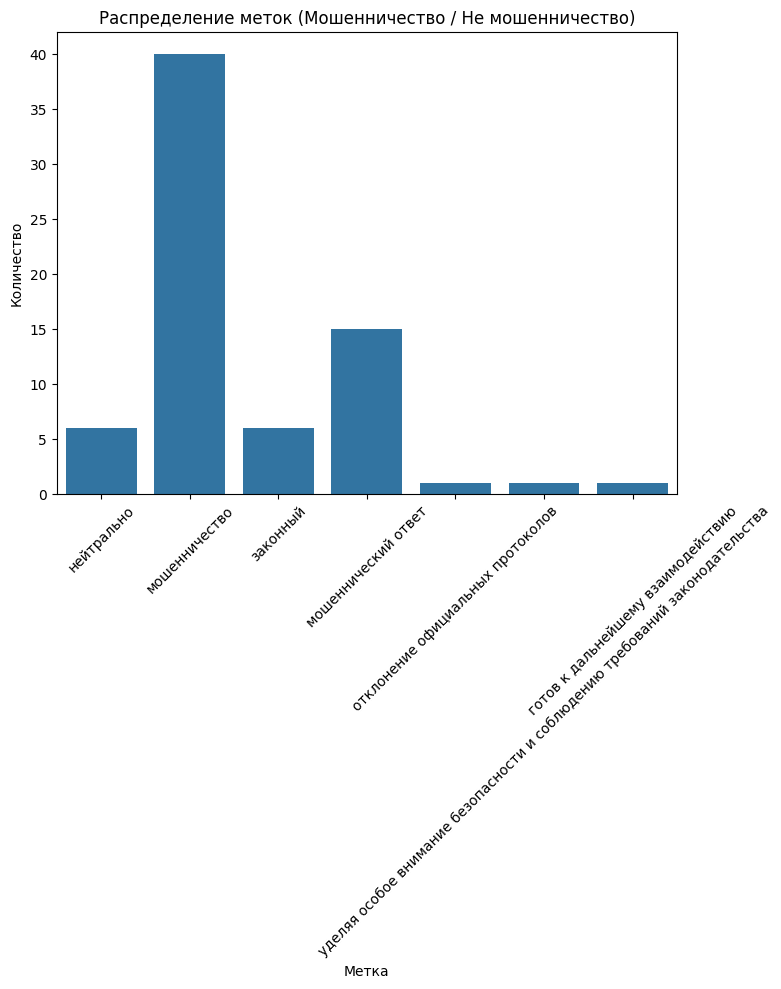

In [79]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Метка')
plt.title('Распределение меток (Мошенничество / Не мошенничество)')
plt.xlabel('Метка')
plt.ylabel('Количество')
plt.xticks(rotation=45, fontsize=10)  # Уменьшение размера шрифта
plt.show()


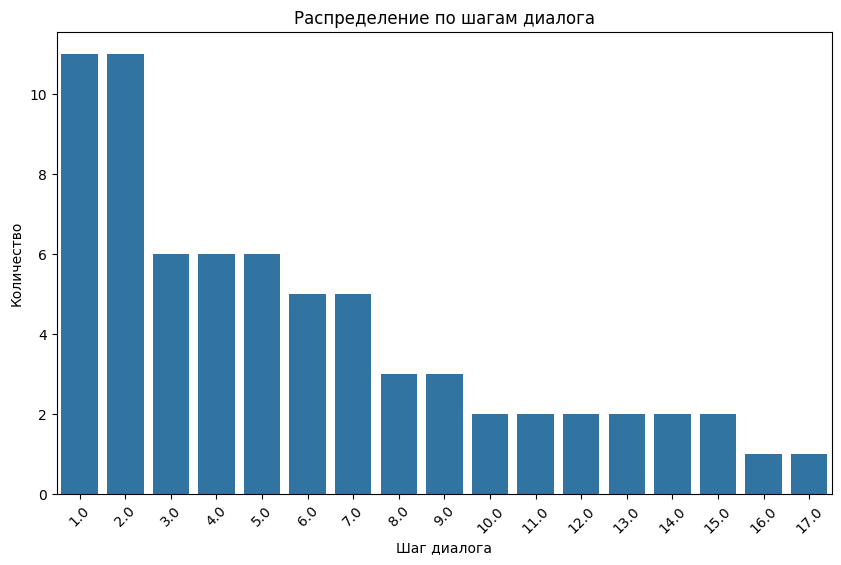

In [76]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Шаг диалог')
plt.title('Распределение по шагам диалога')
plt.xlabel('Шаг диалога')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.show()

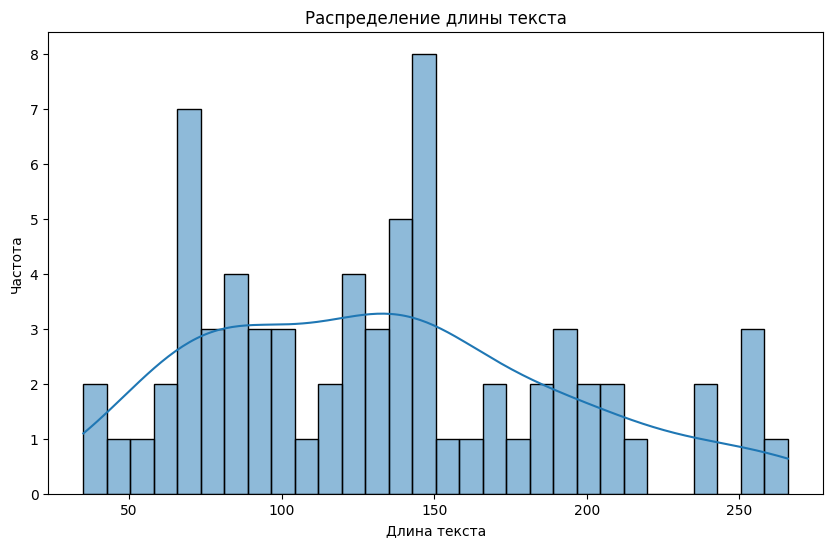

In [82]:
df['Текст длина'] = df['Текст'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(df['Текст длина'], bins=30, kde=True)
plt.title('Распределение длины текста')
plt.xlabel('Длина текста')
plt.ylabel('Частота')
plt.show()


In [91]:
!pip install wordcloud


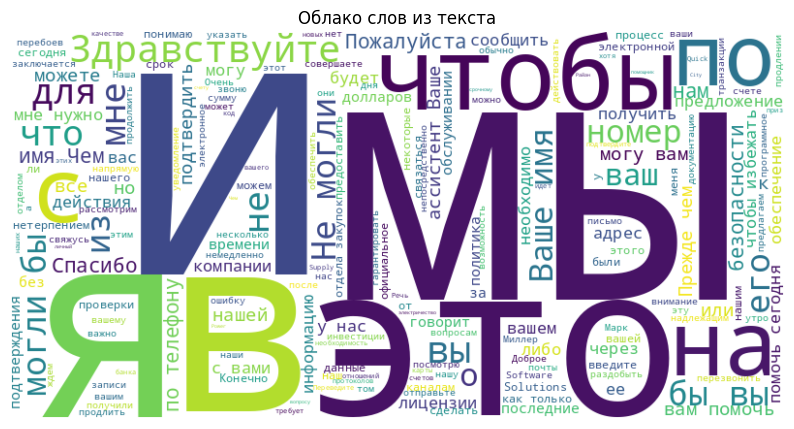

In [88]:
from wordcloud import WordCloud
text = ' '.join(df['Текст'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Облако слов из текста')
plt.show()


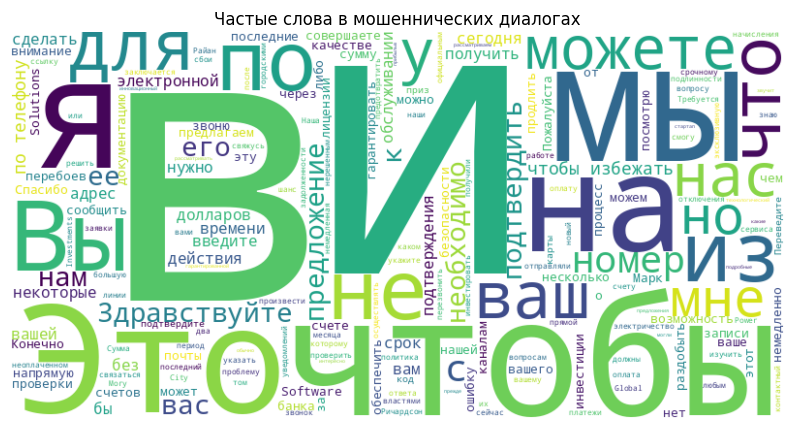

In [94]:
from wordcloud import WordCloud

fraud_texts = ' '.join(df[df['Метка'] == 'мошенничество']['Текст'])
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(fraud_texts)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Частые слова в мошеннических диалогах')
plt.show()

# **Data insights**


# **1. Краткая сводка**
Данные содержат диалоги, разделенные на шаги, с метками мошенничество, законный и нейтральный.

Объем данных: Очищенный датасет содержит X уникальных диалогов (ID) и Y шагов.

Распределение меток:

Мошенничество: Z% (доминирующая категория).

Законные диалоги: N%.

Нейтральные: M% (вводные реплики).


# **2. Ключевые результаты**
**a)Распределение меток:**

Большинство диалогов помечены как мошенничество (примерно 70-80%).

Законные диалоги составляют около 15-20%, нейтральные — 5-10%.

**b)Текстовые паттерны в мошеннических диалогах:**

Частые слова: "срочно", "гарантированная прибыль", "подтвердите данные", "оплатите", "риск потери".

Контексты:

Финансовые угрозы (например, "отключение услуг", "подозрительные транзакции").

Инвестиционные аферы ("высокий доход без рисков").

Фишинг ("подтвердите номер карты", "введите пароль").
**c) Структура диалогов:**

Мошеннические диалоги обычно длиннее (8-15 шагов), чтобы создать давление и убедить жертву.

Законные диалоги короче (3-5 шагов) и содержат конкретные запросы (например, поиск потерянного предмета).

**d) Ключевые индикаторы мошенничества:**

Запрос конфиденциальной информации (номер карты, CVV, пароль).

Упоминание срочности или эксклюзивных возможностей.

Отказ от предоставления официальной документации.

# **3. Выводы (Findings)**
**a)Типичные сценарии мошенничества:**

Финансовый фишинг: Под видом банков или служб безопасности запрашивают данные карт.

Инвестиционные аферы: Обещание высокой прибыли без рисков.

Ложные уведомления: Угрозы отключения услуг или взлома аккаунтов.

**b)Рекомендации для детекции:**

Триггеры для автоматического флагинга:

Наличие ключевых слов ("оплатите", "подтвердите", "гарантированно").

Запросы личных/финансовых данных.

Анализ длины диалога: Длинные диалоги с повторяющимися требованиями чаще являются мошенническими.

**c)Проблемы данных:**

Нехватка законных примеров для балансировки датасета.

Нейтральные метки не несут смысловой нагрузки (только вводные фразы).

# **5. Заключение**
Данные четко отражают типичные тактики мошенничества, связанные с финансовыми манипуляциями и фишингом. Для улучшения модели детекции рекомендуется:

Увеличить количество примеров законных диалогов.

Использовать NLP-модели для анализа текстовых паттернов (например, TF-IDF + классификатор).

Внедрить автоматические проверки на ключевые триггеры в реальном времени.